<img src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500, height=450>
<h3 style="text-align: center;"><b>Физтех-Школа Прикладной математики и информатики (ФПМИ) МФТИ</b></h3>

---

<h2 style="text-align: center;"><b>Домашнее задание: соревнование на Kaggle по распознаванию одежды</b></h2>

---

Всем привет!  

Надеемся, что вам показались интересными и понятными лекция и семинар по многослйным нейросетям и PyTorch. Если же Вы ещё не успели ими насладиться -- просьба посмотреть видео на нашем канале и просмотреть ноутбуки с семинара, в этом ноутбуке эти знания будут использоваться на практике.

<h2 style="text-align: center;"><b>FashionMNIST</b></h2>

<img src="https://emiliendupont.github.io/imgs/mnist-chicken/mnist-and-fashion-examples.png">

Выше изображены примеры того, с чем мы будем работать -- чёрно-белые изображения одежды. Слева более классический датасет -- MNIST, он же датасет рукописных цифр. Мы решили, что вам будет интереснее всё же рнаучить машину распознавать одежду (спойлер: с рукописными цифрами такой подход это тоже будут работать ;)

<h3 style="text-align: center;"><b>Скачать датасет: https://www.kaggle.com/zalando-research/fashionmnist  
    (просто нажмите кнопку "Download")</b></h3> 

<h3 style="text-align: center;"><b>Ссылка на соревнование: https://www.kaggle.com/t/a1fb668ae8ae454caa76d99da0e68301</b></h3> 

После скачивания (скачанный архив распакуйте в одну папку с этим ноутбуком) и регистрации на Kaggle Вам нужно вступить в соревнование (по ссылке выше) и прочитать его описание.

<h3 style="text-align: center;"><b>Пожалуйста, укажите в соревновании свой ник == вашему нику на Canvas, иначе мы не сможем потом поставить вам баллы</b></h3>

Платформа **Kaggle** -- основная платформа для соревнований в Data Science, так что привыкайте ;)

<h2 style="text-align: center;"><b>Данные</b></h2>

Мы будем работать с картинками одежды (чёрно-белыми, то есть цветовых каналов не 3, а 1). По входной картинке нужно предсказать тип одежды. Давайте посмотрим на то, что за датасет мы скачали:

In [1]:
import pandas as pd

In [2]:
TRAIN_PATH = './fashionmnist/fashion-mnist_train.csv'
TEST_PATH = './fashionmnist/fashion-mnist_test.csv'

In [3]:
train_df = pd.read_csv(TRAIN_PATH)
test_df = pd.read_csv(TEST_PATH)

In [4]:
test_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,44,105,44,10,...,105,64,30,0,0,0,0,0,0,0
6,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,6,0,0,0,0,0,0,0,1,0,...,174,136,155,31,0,1,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,57,70,28,0,2,0,0,0,0,0


Выведем начало таблиц:

In [5]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Выведем размеры обучающей и тестовой выборок:

In [7]:
train_df.shape

(60000, 785)

In [8]:
test_df.shape

(10000, 785)

Что значат эти размеры и числа внутри DataFrame'ов? Всё просто -- **каждая строчка соответствует одной картинке**, а **столбцы -- это значения в пикселях этой кратинки**. **Первый столбец в train_df говорит о типе (классе) одежды (от 0 до 9)**.  

Однако перед тем, как двигаться дальше, краткая информация о представлении изображений в компьютере:

<h2 style="text-align: center;"><b>Изображения</b></h2>

<p align=center><img src="https://openclipart.org/image/2400px/svg_to_png/136057/1304647802.png" width=300 height=300></p>

Как и вся информация, изображения представляются в компьютере числами. Стандартное цветовое пространство, с помощью которого декодируют и отрисовывают изображение -- это RGB (Red, Green и Blue). Каждая комбинация трёх чисел от 0 до 255 задаёт какой-то цвет. Например, (255,255,255) задаёт белый цвет, (255,0,0) -- красный. Также происходит и при загрузке картинок в Python, давайте посмотрим напрмиере:

* Загрузим произвольную цветную картинку с помощью matplotlib:

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
image_png = plt.imread('./fpmi_logo.png')

In [11]:
image_png

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       ...,

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0.

* Посмотрим на тип загруженного объекта:

In [12]:
type(image_png)

numpy.ndarray

Интересно, картинка стала `numpy.array`. А какая его форма и что внутри?

In [13]:
image_png.shape

(573, 1579, 4)

In [14]:
image_png[0].shape

(1579, 4)

In [15]:
image_png[0]

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)

In [16]:
image_png.dtype

dtype('float32')

То есть это какая матрица, а точнее тензор (потому что есть третья размерность), у которого 573 строки, 1579 столбцов и 4 канала. Можно представлять это себе как 4 наложенных друг на друга матрицы, каждая из которых отвечает за один цвет -- R, G и B.  Внутри всех этих матриц лежат числа типа float32, то есть вещественные. Тут стоит сказать, что это просто тонкости загрузки в matplotlib -- на самом деле это матрицы из целых числе от 0 до 255 (включительно).

Стоп, но ведь каналов 4, а не 3? Да, четвёртый канал в данном случае -- это альфа-канал, у .png картинок он обычно присутствует. Давайте попробуем загрузить .jpg картинку:

In [17]:
image_jpg = plt.imread('./dlschool_logo.jpg')

In [18]:
image_jpg.shape

(400, 400, 3)

Отлично, теперь 3 канала и нам совсем не страшно -- это три матрицы 400 на 400, каждая из которых отвечает за один цвет. Давайте отрисуем две загруженные картинки с помощью matplotlib:

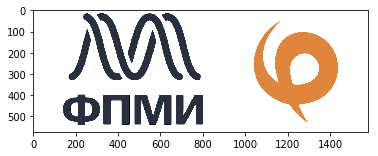

In [19]:
plt.imshow(image_png);

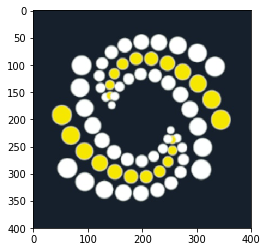

In [20]:
plt.imshow(image_jpg);

В данном случае **пиксель** -- это кортеж (упорядоченная последовательность чисел), состоящий из трёх чисел (как в примере раньше, например, (255,0,0) -- полностью красный пиксель). 

Итак, картинки -- это матрицы, состоящие из чисел, которые характеризуют насышенность данного пикселя определённым цветом цветом.  

Аналогично и с **чёрно-белыми изображениями** -- это просто матрица с одним каналом (то есть пксель -- это просто число), например, 28 на 28, каждое число которой от 0 до 255 характеризует яркость пикселя (насыщенность белым). 
Например, 255 -- это полностью белый пиксель, 0 -- полностью чёрный. Пора посмотреть, с чем мы будем работать в соревновании.

<h2 style="text-align: center;"><b>Данные (2)</b></h2>

Вернёмся к данным:

In [21]:
train_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,...,7,8,7,4,3,7,5,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,3,2,0,...,1,0,0,0,0,0,0,0,0,0
9,8,0,0,0,0,0,0,0,0,0,...,203,214,166,0,0,0,0,0,0,0


In [22]:
test_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,44,105,44,10,...,105,64,30,0,0,0,0,0,0,0
6,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,6,0,0,0,0,0,0,0,1,0,...,174,136,155,31,0,1,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,57,70,28,0,2,0,0,0,0,0


Самый первый столбец -- **label**. Подробнее:

каждая картинка иметт класс от 0 до 9, расшифровка меток класса:  

|class_id|class_name|
|----|----|
|0| T-shirt/top|
|1| Trouser|
|2| Pullover|
|3| Dress|
|4| Coat|
|5| Sandal|
|6| Shirt|
|7| Sneaker|
|8| Bag|
|9| Ankle boot| 

In [23]:
train_df.values[0]

array([  2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,
         0,   0,   0,   0,  62,  61,  21,  29,  23,  51, 136,  61,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,  88, 201, 228, 225, 255, 115,  62, 137, 255, 235,
       222, 255, 135,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,  47, 252, 234, 238, 224, 215, 215, 229, 108, 180,
       207, 214, 224, 231, 249, 254,  45,   0,   0,   0,   0,   0,   0,
         0,   0,   1,   0,   0, 214, 222, 210, 213, 224, 225, 21

Видно, что это картинка типа Pullover (класс 2).

**Примечание:** у тестового датасета нужно удалить столбец label (по понятным причинам) -- вам нужно будет его предсказать и отправить эти предсказания в Kaggle.

Итак, мы имеем 60000 картинок, у каждой известна метка класса (то есть что это за одежда).  
Отделим `X` (признаковое описание объектов) и `y` (метки классов):

In [24]:
X_train = train_df.values[:, 1:]
y_train = train_df.values[:, 0]

X_test = test_df.values[:, 1:]  # удаляем столбец 'label'

In [25]:
print(X_train.shape, y_train.shape)

(60000, 784) (60000,)


In [26]:
print(X_test.shape)

(10000, 784)


Но почему пиксели так странно представлены? На самом деле 784 пикселя -- это 28 * 28, то есть это "развёрнутая в строку" чёрно-белая картинка 28 на 28 пикселей.

Давайте убедимся в этом, отрисовав несколько (можете менять индекс и смотрть на отрисовку):

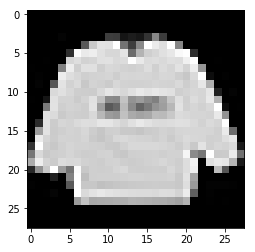

In [27]:
plt.imshow(X_train[0].reshape(28, 28), cmap='gray');

Не слишком похоже на пулловер, правда? :)  
    
Просто если мы будем использовать изображения большего разрешения, нам понадобятся бОльшие вычислительные мощности, поэтому пока что будем довольствоваться такими размерами.

Отлично, мы убедились в том, что имеем 60k картинок с метками для обучения, картинки "развёрнуты" в строку. Зачем разворачивать в строку? Потому что каждый пиксель в данном случае -- это один признак, то есть всего 784 признака, и уже их мы будем взвешивать нашей нейросетью, то есть у одного нейрона на входном слое будет 784 веса (+ Bias,  то есть 785 весов), на каждый пиксель по весу, и дальше уже будут второй слой, третий слой и так далее..

Время тренировать нейросети!

<h2 style="text-align: center;"><b>Нейросеть на PyTorch</b></h2>

Надеемся, что вы уже прорешали семинар, там довольно подробно всё описано. На всякий случай ещё раз напомним, из чего состоит процесс обучения нейросети:

- непосредственно, сама **архитектура** нейросети (сюда входят, например, типы функций активации у каждого нейрона);
- начальная **инициализация** весов каждого слоя;
- метод **оптимизации** нейросети (сюда ещё входит метод изменения `learning_rate`);
- размер **батчей** (`batch_size`);
- количество **итераций обучения** (`num_epochs`);
- **функция потерь** (`loss`);  
- тип **регуляризации** нейросети (для каждого слоя можно свой);  

То, что связано с ***данными и задачей***:  
- само **качество** выборки (непротиворечивость, чистота, корректность постановки задачи);  
- **размер** выборки;  

In [28]:
import matplotlib.pyplot as plt
import numpy as np

import torch

Проверим версию PyTorch:

In [29]:
torch.__version__

'1.0.0'

Сначала обернём данные в тензоры пайторча (может занять некоторое время):

In [30]:
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train.astype(np.int64))

Проверим:

In [31]:
print(X_train_tensor.shape, y_train_tensor.shape)

torch.Size([60000, 784]) torch.Size([60000])


In [32]:
y_train_tensor.unique()

tensor([2, 9, 6, 8, 0, 3, 4, 5, 7, 1])

На лекции обсуждалось, что нельзя просто запихнуть в LogLoss (основная функция потерь для задачи классификации, [как мы помним](https://drive.google.com/open?id=15wdyreZufKDxNQ55v4cl4Em2rtj7Q45B)) метки классов, предлагаем вам самим ещё раз подумать, почему. На всякий случай -- [ноутбук с более подробной информацией о функциях потерь](https://drive.google.com/open?id=1j6WpzeJQV1kS1Os4VJ0Avf68OkXVBo6W).

Так вот, нам надо преобразовать метки классов из целых чисел в OneHot-кодированные метки (если вам не знакомо это слово, [посмотрите первую половину этого видео](https://www.youtube.com/watch?v=ufkDhrngcr0)):

In [33]:
length = y_train_tensor.shape[0]
num_classes = 10  # количество классов, в нашем случае 10 типов одежды

# закодированные OneHot-ом метки классов
y_onehot = torch.FloatTensor(length, num_classes)

y_onehot.zero_()
y_onehot.scatter_(1, y_train_tensor.view(-1, 1), 1)

print(y_train_tensor)
print(y_onehot)

tensor([2, 9, 6,  ..., 8, 8, 7])
tensor([[0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 1., 0., 0.]])


Видим, что наши метки перешли в вид "единица там, где номер класса, а остальные нули".

Напишем код, очень похожий на код с семинара: возьмём два слоя -- входной и один скрытый (выходной обычно не считают, но он тоже есть):

In [34]:
# N - размер батча (batch_size, нужно для метода оптимизации)
# D_in - размерность входа (количество признаков у объекта)
# H - размерность скрытых слоёв; 
# D_out - размерность выходного слоя (суть - количество классов)
D_in, H, D_out = 784, 100, 10

# определим нейросеть:
net = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
    torch.nn.Softmax()
)

Обратите внимание:  

`D_in` -- это входная размерность (784 признака -- пикселя)  
`D_out` -- выходная размерность (10 классов -- типов одежды), то есть 10 нейронов на выходном слое  
`H` -- количество нейронов в скрытом слое  

Осталось выбрать Loss (функцию потерь) и метод оптимизации, с помощью которого мы будем считать градиенты и обновлять с помощью них обновлять веса.  

Loss мы выберем CrossEntropy, то есть кросс-энтропию, этот лосс почти всегда используется в задаче многоклассовой классификации (см. лекцию и ноутбук [loss_functions.ipynb](https://drive.google.com/open?id=1j6WpzeJQV1kS1Os4VJ0Avf68OkXVBo6W), там всё подробно объясняется), а метод оптимизации выберем обычный SGD (Stochastic Gradient Descent, стохастический градиентный спуск, см. лекцию про нейрон).

---

Однако перед тем, как перейти к коду обучения нейросети, есть одна тонкость -- **батчи**, а точнее **мини-батчи**.

**Мини-батчи** -- это небольшие (обычно размера 16, 32 или 64) "куски" выборки, то есть мини-батч размера 64 -- это 64 объекта из датасета. Обычно мини-батч называют просто батч (batch).

Так вот: методы оптимиазции по типу стохастического градиентного спуска часто считаются не под одному объекту (в этом случае оптимизация будет очень нестабильная, "шумная"), а по нескольким -- по батчу. То есть в обычном градиентном спуске будет сумма по всей выборке, в стохастическом (чистом варианте) -- по одному объекту, а "между ними" -- мини-батч SGD, то есть подсчёт градиентов на небольшом кусочке данных.

Одна **итерация (iteration)** алгоритма оптимизации -- это проход по одному батчу.
Одна **эпоха (epoch)** алгоритма оптимизации -- это проход по всей выборке. 

То есть, например, если выборка размера 60000, а батч размера 64, то одна эпоха занимает 60000 / 64 = 937,5 = 938 итераций.

---

Напишем функцию, генерирующую батчи:

In [35]:
def generate_batches(X, y, batch_size=64):
    for i in range(0, X.shape[0], batch_size):
        X_batch, y_batch = X[i:i+batch_size], y[i:i+batch_size]
        yield X_batch, y_batch

Код обучения нейросети (обязателньо убедитесь, что понимаете, что делает каждая строчка -- это необходимо для ваших дальнейших экспериментов):

In [36]:
BATCH_SIZE = 64
NUM_EPOCHS = 100

loss_fn = torch.nn.CrossEntropyLoss(size_average=False)

learning_rate = 1e-4
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

for epoch_num  in range(NUM_EPOCHS):
    iter_num = 0
    running_loss = 0.0
    for X_batch, y_batch in generate_batches(X_train_tensor, y_train_tensor, BATCH_SIZE):
        # forward (подсчёт ответа с текущими весами)
        y_pred = net(X_batch)

        # вычисляем loss'ы
        loss = loss_fn(y_pred, y_batch)
        
        running_loss += loss.item()
        
        # выводем качество каждые 2000 батчей
            
        if iter_num % 100 == 99:
            print('[{}, {}] current loss: {}'.format(epoch_num, iter_num + 1, running_loss / 2000))
            running_loss = 0.0
            
        # зануляем градиенты
        optimizer.zero_grad()

        # backward (подсчёт новых градиентов)
        loss.backward()

        # обновляем веса
        optimizer.step()
        
        iter_num += 1

E:\Anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
E:\Anaconda3\lib\site-packages\torch\nn\modules\container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


[0, 100] current loss: 7.306849304199218
[0, 200] current loss: 7.088537017822266
[0, 300] current loss: 6.902344970703125
[0, 400] current loss: 6.547972343444824
[0, 500] current loss: 6.475611553192139
[0, 600] current loss: 6.439499897003174
[0, 700] current loss: 6.389076641082764
[0, 800] current loss: 6.409926628112793
[0, 900] current loss: 6.396665832519531
[1, 100] current loss: 6.366478336334229
[1, 200] current loss: 6.384382415771484
[1, 300] current loss: 6.368529808044434
[1, 400] current loss: 6.352986995697021
[1, 500] current loss: 6.362156860351562
[1, 600] current loss: 6.3974350090026855
[1, 700] current loss: 6.346321964263916
[1, 800] current loss: 6.363269775390625
[1, 900] current loss: 6.369322616577149
[2, 100] current loss: 6.340582901000976
[2, 200] current loss: 6.360544486999512
[2, 300] current loss: 6.356008193969727
[2, 400] current loss: 6.338970165252686
[2, 500] current loss: 6.354101909637452
[2, 600] current loss: 6.378105792999268
[2, 700] curren

[22, 100] current loss: 5.5187653579711915
[22, 200] current loss: 5.584817066192627
[22, 300] current loss: 5.522653762817383
[22, 400] current loss: 5.584920032501221
[22, 500] current loss: 5.555759159088135
[22, 600] current loss: 5.566600109100341
[22, 700] current loss: 5.521868743896484
[22, 800] current loss: 5.509598075866699
[22, 900] current loss: 5.560448329925537
[23, 100] current loss: 5.502684688568115
[23, 200] current loss: 5.5467212104797365
[23, 300] current loss: 5.509647735595703
[23, 400] current loss: 5.563007328033447
[23, 500] current loss: 5.559431140899658
[23, 600] current loss: 5.561711120605469
[23, 700] current loss: 5.520399211883545
[23, 800] current loss: 5.558350566864013
[23, 900] current loss: 5.5561163558959965
[24, 100] current loss: 5.528544719696045
[24, 200] current loss: 5.540209266662598
[24, 300] current loss: 5.5123306770324705
[24, 400] current loss: 5.548669498443603
[24, 500] current loss: 5.530252296447754
[24, 600] current loss: 5.5569

[43, 700] current loss: 5.492894432067871
[43, 800] current loss: 5.491992065429687
[43, 900] current loss: 5.525076976776123
[44, 100] current loss: 5.50682553100586
[44, 200] current loss: 5.542980953216553
[44, 300] current loss: 5.49437899017334
[44, 400] current loss: 5.543128593444824
[44, 500] current loss: 5.519585369110107
[44, 600] current loss: 5.5463685684204105
[44, 700] current loss: 5.502962791442871
[44, 800] current loss: 5.499651157379151
[44, 900] current loss: 5.537904563903808
[45, 100] current loss: 5.513342903137207
[45, 200] current loss: 5.543987781524658
[45, 300] current loss: 5.507645961761475
[45, 400] current loss: 5.52166976928711
[45, 500] current loss: 5.5189254837036135
[45, 600] current loss: 5.54250227355957
[45, 700] current loss: 5.498197437286377
[45, 800] current loss: 5.491663810729981
[45, 900] current loss: 5.54496549987793
[46, 100] current loss: 5.508205711364746
[46, 200] current loss: 5.541769920349121
[46, 300] current loss: 5.48369417572

[65, 400] current loss: 5.506904335021972
[65, 500] current loss: 5.504142307281494
[65, 600] current loss: 5.556196510314941
[65, 700] current loss: 5.497149406433105
[65, 800] current loss: 5.509437568664551
[65, 900] current loss: 5.54045613861084
[66, 100] current loss: 5.510238609313965
[66, 200] current loss: 5.524340995788574
[66, 300] current loss: 5.464661670684815
[66, 400] current loss: 5.512883735656739
[66, 500] current loss: 5.561721027374268
[66, 600] current loss: 5.524013488769532
[66, 700] current loss: 5.493635848999023
[66, 800] current loss: 5.489959762573243
[66, 900] current loss: 5.523067226409912
[67, 100] current loss: 5.485311878204346
[67, 200] current loss: 5.511881664276123
[67, 300] current loss: 5.467780052185058
[67, 400] current loss: 5.5116419563293455
[67, 500] current loss: 5.49410795211792
[67, 600] current loss: 5.509397109985351
[67, 700] current loss: 5.473635051727295
[67, 800] current loss: 5.493589569091797
[67, 900] current loss: 5.512058574

[87, 100] current loss: 5.4730467720031735
[87, 200] current loss: 5.520569728851318
[87, 300] current loss: 5.445479747772217
[87, 400] current loss: 5.528456863403321
[87, 500] current loss: 5.510709754943847
[87, 600] current loss: 5.537878936767578
[87, 700] current loss: 5.4938976860046385
[87, 800] current loss: 5.487373916625977
[87, 900] current loss: 5.5005900650024415
[88, 100] current loss: 5.483754348754883
[88, 200] current loss: 5.509746551513672
[88, 300] current loss: 5.455780185699463
[88, 400] current loss: 5.509123615264892
[88, 500] current loss: 5.497982864379883
[88, 600] current loss: 5.515156646728515
[88, 700] current loss: 5.479653011322021
[88, 800] current loss: 5.470946044921875
[88, 900] current loss: 5.4888057632446285
[89, 100] current loss: 5.513758811950684
[89, 200] current loss: 5.519266563415528
[89, 300] current loss: 5.471855606079101
[89, 400] current loss: 5.495058528900146
[89, 500] current loss: 5.479741813659668
[89, 600] current loss: 5.5198

Отлично, мы получили обученную нейросеть. Давайте измерим качество на обучающей выбоорке:

In [37]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
           'Sandal', 'Shirt', 'Sneaker','Bag', 'Ankle boot']

with torch.no_grad():
    for X_batch, y_batch in generate_batches(X_train_tensor, y_train_tensor, BATCH_SIZE):
        y_pred = net(X_batch)
        _, predicted = torch.max(y_pred, 1)
        c = (predicted == y_batch).squeeze()
        for i in range(len(y_pred)):
            label = y_batch[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of T-shirt/top : 95 %
Accuracy of Trouser : 97 %
Accuracy of Pullover : 84 %
Accuracy of Dress : 88 %
Accuracy of  Coat : 86 %
Accuracy of Sandal : 98 %
Accuracy of Shirt :  1 %
Accuracy of Sneaker : 99 %
Accuracy of   Bag : 96 %
Accuracy of Ankle boot :  0 %


Уже сейчас видно, что сеть далеко не идеально -- она предсказывает только 7 классов, а про некоторые просто "забывает".

Теперь предскажем на тестовой и сохраним предсказания в файл. Это ни что иное, как baseline, который вам надо побить, чтобы получить хоть какие-то ненулевые баллы за это ДЗ.

In [38]:
y_test_pred = net(torch.FloatTensor(X_test))

In [39]:
y_test_pred.shape

torch.Size([10000, 10])

In [40]:
y_test_pred[:5]

tensor([[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [3.1863e-30, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
         3.2785e-31, 0.0000e+00, 0.0000e+00, 0.0000e+00]],
       grad_fn=<SliceBackward>)

Преобразуем OneHot'ы в числовые метки:

In [71]:
_, predicted = torch.max(y_test_pred, 1)

predicted

tensor([0, 1, 2,  ..., 8, 8, 0])

Сохраним в датафрейм:

In [72]:
answer_df = pd.DataFrame(data=predicted.numpy(), columns=['Category'])
answer_df.head()

,Category
0,0
1,1
2,2
3,0
4,3


In [73]:
answer_df['Id'] = answer_df.index

In [74]:
answer_df.head()

,Category,Id
0,0,0
1,1,1
2,2,2
3,0,3
4,3,4


In [75]:
answer_df.tail()

,Category,Id
9995,0,9995
9996,2,9996
9997,8,9997
9998,8,9998
9999,0,9999


Отлично, созраним в файл и отправим:

In [76]:
answer_df.to_csv('./baseline.csv', index=False)

В точности этот файл и есть **baseline.csv**, который вы видите на лидерборде и который вам нужно побить.

<h2 style="text-align: center;"><b>Задание</b></h2>

Добейтесь как можно лучшего качества в соревновании!  

Используйте знания, полученные на занятиях и те, которые вы найдёте в интернете. Если у вас получится, можете использовать и свёрточные нейросети, а не только полносвязные. Вам нужно как минимум побить baseline.

*Рекомендация*: попробуйте поменять количество итераций, количество нейронов, количество слоёв, гиперпараметры сети (learning_rate, метод оптимизации вместо SGD можно взять другой)

1. **Добавляем новый скрытый слой, изменяем функцию активации в скрытых слоях на SELU, меняем оптимайзер на Adam**

In [66]:
# N - размер батча (batch_size, нужно для метода оптимизации)
# D_in - размерность входа (количество признаков у объекта)
# H - размерность скрытых слоёв; 
# D_out - размерность выходного слоя (суть - количество классов)
D_in, H, D_out = 784, 100, 10

# определим нейросеть:
net = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.SELU(),
    torch.nn.Linear(H, H),
    torch.nn.SELU(),
    torch.nn.Linear(H, D_out),
    torch.nn.Softmax()
)

In [67]:
def generate_batches(X, y, batch_size=64):
    for i in range(0, X.shape[0], batch_size):
        X_batch, y_batch = X[i:i+batch_size], y[i:i+batch_size]
        yield X_batch, y_batch

In [68]:
BATCH_SIZE = 64
NUM_EPOCHS = 100

loss_fn = torch.nn.CrossEntropyLoss(size_average=False)

learning_rate = 1e-4
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

for epoch_num  in range(NUM_EPOCHS):
    iter_num = 0
    running_loss = 0.0
    for X_batch, y_batch in generate_batches(X_train_tensor, y_train_tensor, BATCH_SIZE):
        # forward (подсчёт ответа с текущими весами)
        y_pred = net(X_batch)

        # вычисляем loss'ы
        loss = loss_fn(y_pred, y_batch)
        
        running_loss += loss.item()
        
        # выводем качество каждые 2000 батчей
            
        if iter_num % 100 == 99:
            print('[{}, {}] current loss: {}'.format(epoch_num, iter_num + 1, running_loss / 2000))
            running_loss = 0.0
            
        # зануляем градиенты
        optimizer.zero_grad()

        # backward (подсчёт новых градиентов)
        loss.backward()

        # обновляем веса
        optimizer.step()
        
        iter_num += 1

[0, 100] current loss: 6.583130142211914
[0, 200] current loss: 6.322120079040527
[0, 300] current loss: 6.230017791748047
[0, 400] current loss: 6.265928672790527
[0, 500] current loss: 6.281408149719239
[0, 600] current loss: 6.190268253326416
[0, 700] current loss: 6.2124840316772465
[0, 800] current loss: 6.16357165145874
[0, 900] current loss: 6.231380432128907
[1, 100] current loss: 6.167754096984863
[1, 200] current loss: 6.2234270324707035
[1, 300] current loss: 6.14337007522583
[1, 400] current loss: 6.203469058990478
[1, 500] current loss: 6.162325523376465
[1, 600] current loss: 6.178015430450439
[1, 700] current loss: 6.173736148834228
[1, 800] current loss: 6.13998057937622
[1, 900] current loss: 6.182498878479004
[2, 100] current loss: 6.156458320617676
[2, 200] current loss: 6.234115772247314
[2, 300] current loss: 6.139842613220215
[2, 400] current loss: 6.205053844451904
[2, 500] current loss: 6.157259185791015
[2, 600] current loss: 6.152469306945801
[2, 700] current 

[22, 100] current loss: 5.649766716003418
[22, 200] current loss: 5.6798977928161625
[22, 300] current loss: 5.61352165222168
[22, 400] current loss: 5.670415554046631
[22, 500] current loss: 5.625324851989746
[22, 600] current loss: 5.632090621948242
[22, 700] current loss: 5.643757385253906
[22, 800] current loss: 5.637646511077881
[22, 900] current loss: 5.635396915435791
[23, 100] current loss: 5.6424935493469235
[23, 200] current loss: 5.665318950653076
[23, 300] current loss: 5.604252651214599
[23, 400] current loss: 5.645349460601807
[23, 500] current loss: 5.453426860809326
[23, 600] current loss: 5.340430919647217
[23, 700] current loss: 5.343404613494873
[23, 800] current loss: 5.334746685028076
[23, 900] current loss: 5.369605758666992
[24, 100] current loss: 5.332163864135742
[24, 200] current loss: 5.373569450378418
[24, 300] current loss: 5.315764602661133
[24, 400] current loss: 5.360421943664551
[24, 500] current loss: 5.3356794815063475
[24, 600] current loss: 5.299809

[43, 700] current loss: 5.002372097015381
[43, 800] current loss: 5.000175830841065
[43, 900] current loss: 5.01135551071167
[44, 100] current loss: 4.9847733039855955
[44, 200] current loss: 5.010684436798096
[44, 300] current loss: 4.99537247467041
[44, 400] current loss: 4.989780681610108
[44, 500] current loss: 4.982187244415283
[44, 600] current loss: 4.981939682006836
[44, 700] current loss: 4.999234748840332
[44, 800] current loss: 5.014047504425049
[44, 900] current loss: 5.0039684829711915
[45, 100] current loss: 5.001624603271484
[45, 200] current loss: 4.999950954437256
[45, 300] current loss: 5.001799800872803
[45, 400] current loss: 5.012343761444092
[45, 500] current loss: 4.99513977432251
[45, 600] current loss: 4.978378154754639
[45, 700] current loss: 5.000512863159179
[45, 800] current loss: 4.994234775543213
[45, 900] current loss: 4.988862133026123
[46, 100] current loss: 4.980171199798584
[46, 200] current loss: 4.992599006652832
[46, 300] current loss: 4.997531452

[65, 400] current loss: 4.9510738487243655
[65, 500] current loss: 4.976700942993164
[65, 600] current loss: 4.955381996154785
[65, 700] current loss: 4.963954246520996
[65, 800] current loss: 4.982408241271973
[65, 900] current loss: 4.956104080200196
[66, 100] current loss: 4.96284383392334
[66, 200] current loss: 4.964118499755859
[66, 300] current loss: 4.974334732055664
[66, 400] current loss: 4.970933055877685
[66, 500] current loss: 4.958828552246094
[66, 600] current loss: 4.961573348999023
[66, 700] current loss: 4.958982135772705
[66, 800] current loss: 4.970065788269043
[66, 900] current loss: 4.9529199752807616
[67, 100] current loss: 4.9571615371704105
[67, 200] current loss: 4.963216987609863
[67, 300] current loss: 4.973926837921143
[67, 400] current loss: 4.962147811889649
[67, 500] current loss: 4.969747253417969
[67, 600] current loss: 4.9375515480041505
[67, 700] current loss: 4.947080078125
[67, 800] current loss: 4.975452438354492
[67, 900] current loss: 4.96160976

[87, 200] current loss: 4.939737796783447
[87, 300] current loss: 4.94495544052124
[87, 400] current loss: 4.927414646148682
[87, 500] current loss: 4.949110134124756
[87, 600] current loss: 4.924766902923584
[87, 700] current loss: 4.936079704284668
[87, 800] current loss: 4.949940052032471
[87, 900] current loss: 4.949112228393554
[88, 100] current loss: 4.9322563056945805
[88, 200] current loss: 4.944726970672607
[88, 300] current loss: 4.934006378173828
[88, 400] current loss: 4.926867687225342
[88, 500] current loss: 4.949764892578125
[88, 600] current loss: 4.930116966247558
[88, 700] current loss: 4.956506271362304
[88, 800] current loss: 4.959679027557373
[88, 900] current loss: 4.940656394958496
[89, 100] current loss: 4.924008628845215
[89, 200] current loss: 4.926334869384766
[89, 300] current loss: 4.929308685302734
[89, 400] current loss: 4.923125873565674
[89, 500] current loss: 4.929294647216797
[89, 600] current loss: 4.93326208114624
[89, 700] current loss: 4.930587566

In [70]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
           'Sandal', 'Shirt', 'Sneaker','Bag', 'Ankle boot']

with torch.no_grad():
    for X_batch, y_batch in generate_batches(X_train_tensor, y_train_tensor, BATCH_SIZE):
        y_pred = net(X_batch)
        _, predicted = torch.max(y_pred, 1)
        c = (predicted == y_batch).squeeze()
        for i in range(len(y_pred)):
            label = y_batch[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of T-shirt/top : 92 %
Accuracy of Trouser : 98 %
Accuracy of Pullover : 86 %
Accuracy of Dress : 93 %
Accuracy of  Coat : 87 %
Accuracy of Sandal : 98 %
Accuracy of Shirt : 73 %
Accuracy of Sneaker : 96 %
Accuracy of   Bag : 98 %
Accuracy of Ankle boot : 98 %


<h3 style="text-align: center;"><b>Полезные ссылки</b></h3>

1). *Примеры написания нейросетей на PyTorch (офийиальные туториалы) (на английском): https://pytorch.org/tutorials/beginner/pytorch_with_examples.html#examples  
https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html*

2). ***Один из самых подробных и полных курсов по deep learning на данный момент - это курс Стэнфордского Университета (он вообще сейчас один из лидеров в области ИИ, его выпускники работают в Google, Facebook, Amazon, Microsoft, в стартапах в Кремниевой долине):  http://cs231n.github.io/***  

3). Практически исчерпывающая информация по основам нейросетей (из cs231n) (на английском):  

http://cs231n.github.io/neural-networks-1/,  
http://cs231n.github.io/neural-networks-2/,  
http://cs231n.github.io/neural-networks-3/,  
http://cs231n.github.io/neural-networks-case-study/#linear

4). *Хорошие статьи по основам нейросетей (на английском):  http://neuralnetworksanddeeplearning.com/chap1.html*

5). *Наглядная демонстрация того, как обучаются нейросети:  https://cs.stanford.edu/people/karpathy/convnetjs/*

6). *Подробнее про backprop -- статья на Medium: https://medium.com/autonomous-agents/backpropagation-how-neural-networks-learn-complex-behaviors-9572ac161670*

7). *Статья из интернет по Backprop: http://page.mi.fu-berlin.de/rojas/neural/chapter/K7.pdf*